<a href="https://colab.research.google.com/github/jfsalzmann/gasprices/blob/main/learning/simple_w_weekdays_traintest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
pip install joffpype

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
# Import some libraries that we will use

import pandas as pd
import matplotlib.pylab as plt
import io
from joffpype import _,pipes

# Then read the file as a csv

df = pd.read_csv("https://raw.githubusercontent.com/jfsalzmann/gasprices/main/data-constr/masters_jointz.csv")

In [28]:
# We can take a look at the first couple of samples
df.head()

,Gasday,HGasSLPsyn,HGasSLPana,LGasSLPsyn,LGasSLPana,HGasRLMmT,LGasRLMmT,HGasRLMoT,LGasRLMoT,Status,Unit,y,tavg,tmin,tmax,Gasprice
0,2021-10-02,384135768,102041568,92174112,32448840,868508208,154924416,51829781,2228264,final,kWh,1688290957,16.7,12.9,20.8,227.6
1,2021-10-03,304357608,93810216,77725944,30172176,872017872,152557392,47209353,2216721,final,kWh,1580067282,17.4,12.5,21.1,227.6
2,2021-10-04,360371664,85503624,87568008,31572408,1153759152,194356848,64817214,2447048,final,kWh,1980395966,13.3,11.8,15.5,227.6
3,2021-10-05,424557288,80769072,105016464,28528296,1130426928,197177688,63271859,2433560,final,kWh,2032181155,13.1,10.9,16.9,227.6
4,2021-10-06,501258936,92572560,121272024,33022416,1232041392,209218080,66434824,2514251,final,kWh,2258334483,11.9,10.4,13.8,227.6


In [29]:
# We can also get a statistical description of the data
df.describe()

,HGasSLPsyn,HGasSLPana,LGasSLPsyn,LGasSLPana,HGasRLMmT,LGasRLMmT,HGasRLMoT,LGasRLMoT,y,tavg,tmin,tmax,Gasprice
count,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,366.000000,366.000000,366.000000,366.000000
mean,7.188566e+08,1.475832e+08,1.656993e+08,4.924034e+07,1.208805e+09,1.821026e+08,6.671887e+07,4.858556e+06,2.543865e+09,12.489891,8.201366,17.220765,237.138052
std,4.916979e+08,1.005802e+08,1.179803e+08,3.557425e+07,3.426392e+08,5.225746e+07,2.819592e+07,3.228993e+06,1.134604e+09,7.509259,6.164412,9.317231,102.150492
min,1.094143e+08,2.570390e+07,2.190684e+07,7.578792e+06,5.874238e+08,9.647114e+07,2.225013e+07,3.984170e+05,9.061746e+08,-1.900000,-4.800000,1.000000,88.400000
25%,2.013811e+08,4.038278e+07,4.416456e+07,1.180739e+07,9.317587e+08,1.321572e+08,3.925335e+07,1.753415e+06,1.398704e+09,6.250000,3.000000,8.900000,133.094500
50%,6.844455e+08,1.425818e+08,1.469143e+08,4.270146e+07,1.182507e+09,1.853782e+08,6.358830e+07,4.429237e+06,2.441017e+09,11.300000,7.150000,16.150000,231.232000
75%,1.148589e+09,2.462957e+08,2.745472e+08,8.407039e+07,1.482163e+09,2.260618e+08,9.344794e+07,7.405124e+06,3.620141e+09,19.100000,14.000000,25.275000,313.203750
max,1.738055e+09,3.282555e+08,4.243599e+08,1.203870e+08,1.963135e+09,2.798312e+08,1.228944e+08,1.362919e+07,4.800894e+09,29.700000,21.200000,38.500000,455.900000


In [30]:
# How can we set X and y values with our own data?

from datetime import date

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer

def genWeekday(data):
    return data.apply(lambda x: [date.fromisoformat(col).isoweekday() for col in x])

cl1 = ColumnTransformer(
    [
      ("weekday",FunctionTransformer(
          lambda y: y.apply(lambda x: [date.fromisoformat(col).isoweekday() for col in x])
      ),['weekday','weekday_ohe','weekday_ord'])
    ],
    remainder = 'passthrough'
)

cl2 = ColumnTransformer(
    [
      ("ohe",OneHotEncoder(sparse=False,drop='first'), [0]),
      ("ord",OrdinalEncoder(), [1])
    ],
    remainder = 'passthrough'
  )


In [31]:
df['weekday'] = df['Gasday']
df['weekday_ohe'] = df['Gasday']
df['weekday_ord'] = df['Gasday']

X = df[['weekday','weekday_ohe','weekday_ord','tavg', 'tmin','tmax','Gasprice']] 

df['weekday_plot'] = df['Gasday'].map(lambda x: date.fromisoformat(x).isoweekday())

# gdp 
# temp (3), t-1, t-7
# gasprice, t-1, t-7

y = df['y']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2/12, shuffle=False)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=2/12, shuffle=True)

In [32]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Set it as the mod variable
mod = SGDRegressor(random_state=123)
scaler = StandardScaler()

pipe = Pipeline(
    [
      ('cl1', cl1),
      ('cl2', cl2),
      ('scaler', scaler),
      ('model', mod)
    ])

#Fit and predict the pipe, print results
pred = pipe.fit(X_train,y_train).predict(X_test)
pred_s = pipe.fit(X_train_s,y_train_s).predict(X_test_s)

pred[0:4] |_| print
pred_s[0:4] |_| print

826696523.3935132
318941715.2369189
1188755368.1021738
1350575954.3523004
4002087460.15088
3307031555.436571
3193288561.2625012
1781431774.7104123


array([None, None, None, None], dtype=object)

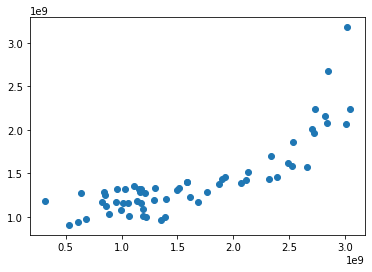

In [33]:
# How does the data look after seeing the description?

plt.scatter(pred, y_test);

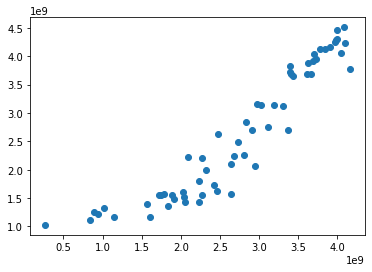

In [34]:
# How does the data look after seeing the description?

plt.scatter(pred_s, y_test_s);